In [1]:
from qcdenoise import CircuitSampler
import numpy as np
from qiskit.tools.visualization import plot_histogram

## 1. GHZ

In [19]:
noise_specs = {'class':'unitary_noise', 
                    'type':'phase_amplitude_damping_error', 
                    'max_prob': 0.35, 
                    'unitary_op':None}
circuit_name = 'UCCSD'
circuit_name = 'GHZ'
n_qubits = 4
circ_sampler = CircuitSampler(circuit_name=circuit_name, n_qubits=n_qubits, noise_specs=noise_specs, verbose=False)

#### Build Circuit Sampler

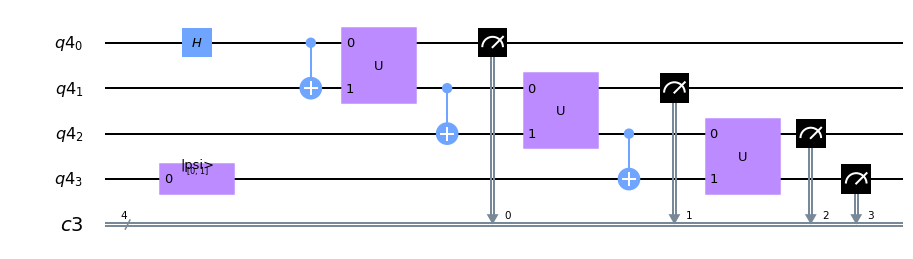

In [20]:
circ_sampler.build_circuit()
circ_sampler.build_noise_model()
circ = circ_sampler.circuit
circ.draw()

In [22]:
noise_model = circ_sampler.noise_model
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'u3', 'unitary']
  Instructions with noise: ['unitary_2_3', 'unitary_0_1', 'unitary_1_2']
  All-qubits errors: ['unitary_0_1', 'unitary_1_2', 'unitary_2_3']


#### Execute and Plot

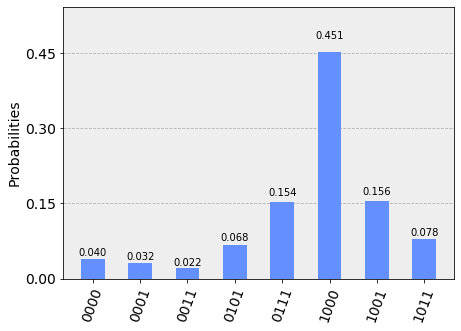

In [24]:
counts = circ_sampler.execute_circuit()
for key in list(counts.keys()):
    if counts[key] < 5e-3:
        counts.pop(key)
plot_histogram(counts)

## 2. UCCSD

In [42]:
noise_specs = {'class':'unitary_noise', 
                    'type':'phase_amplitude_damping_error', 
                    'max_prob': 0.2, 
                    'unitary_op':None}
circuit_name = 'UCCSD'
n_qubits = 3
circ_sampler = CircuitSampler(circuit_name=circuit_name, n_qubits=n_qubits, noise_specs=noise_specs, verbose=True)

Using Unitary Noise Model (phase_amplitude_damping_error)


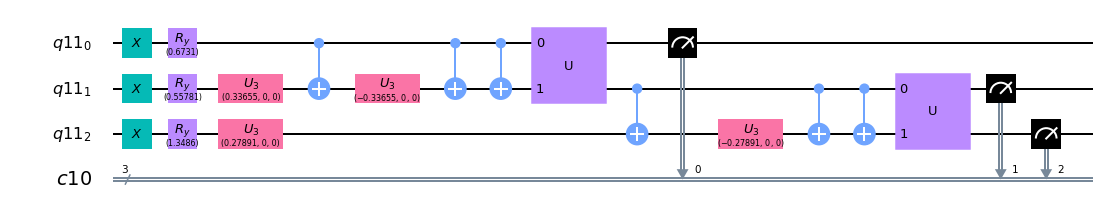

In [43]:
circ_sampler.build_circuit()
circ_sampler.build_noise_model()
circ_sampler.circuit.draw()

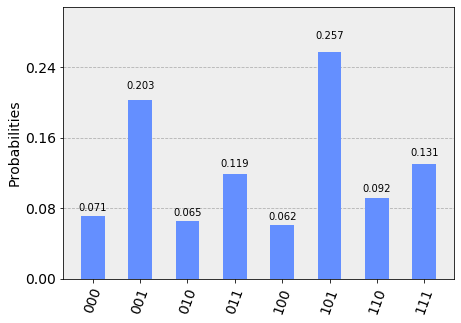

In [44]:
counts = circ_sampler.execute_circuit()
for key in list(counts.keys()):
    if counts[key] < 5e-3:
        counts.pop(key)
plot_histogram(counts)

In [45]:
circ_sampler.noise_model

NoiseModel:
  Basis gates: ['cx', 'id', 'u3', 'unitary']
  Instructions with noise: ['unitary_0_1', 'unitary_1_2']
  All-qubits errors: ['unitary_0_1', 'unitary_1_2']